In [2]:
import json
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# from torch.utils.data import DataLoader
# from torchvision.models import vgg19
# import torch
# from torch.utils import data as data_utils

import tensorflow as tf


columns = ['opp_switch', 'opp_damage_dealt', 'opp_effectiveness', 'opp_damage_taken', 'opp_heal', 'opp_faint', 'opp_boost_off', 'opp_boost_def', 'opp_boost_spe', 'opp_unboost_off', 'opp_unboost_def', 'opp_unboost_spe', 'opp_basepower', 'opp_accuracy', 'opp_stab', 'opp_priority', 'opp_first', 'switch', 'damage_dealt', 'effectiveness', 'damage_taken', 'heal', 'faint', 'boost_off', 'boost_def', 'boost_spe', 'unboost_off', 'unboost_def', 'unboost_spe', 'basepower', 'accuracy', 'stab', 'priority', 'first', 'turn', 'turn_norm', 'opp_alive', 'alive', 'weight', 'winner', 'opp_winner', 'opp_usage']


In [91]:
with open('datasets/clean/images.json') as fl:
  _data = json.load(fl)

train_images, train_labels, train_poke = list(zip(
  *[(np.array(img), label, poke) for img, label, poke in
    zip(_data['train_images'], _data['train_labels'], _data['train_poke'])
    if np.array(img).shape == np.array(_data['train_images'][0]).shape]
))

test_images, test_labels, test_poke = zip(
	*[(np.array(img), label, poke) for img, label, poke in
	  zip(_data['test_images'], _data['test_labels'], _data['test_poke'])
    if np.array(img).shape == np.array(_data['test_images'][0]).shape]
)

train_labels, test_labels = np.array(train_labels), np.array(test_labels)

In [92]:
print(len(train_images))
print(len(_data['train_images']))
print(len(test_images))
print(len(_data['test_images']))


2246
2246
1860
1862


(array([ 52., 215.,  74., 150., 194., 179., 250., 296., 150., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

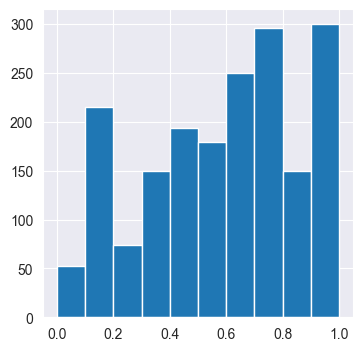

In [93]:
plt.figure(figsize=(4, 4))
plt.hist(test_labels)

(array([194., 229., 120., 210., 229., 300., 214., 150., 300., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

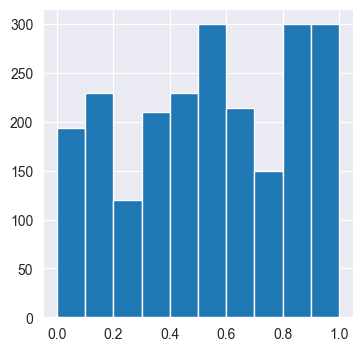

In [94]:
plt.figure(figsize=(4, 4))
plt.hist(train_labels)

,opp_switch,opp_damage_dealt,opp_effectiveness,opp_damage_taken,opp_heal,opp_faint,opp_boost_off,opp_boost_def,opp_boost_spe,opp_unboost_off,...,priority,first,turn,turn_norm,opp_alive,alive,weight,winner,opp_winner,opp_usage
0,1.000000,0.750542,0.905673,0.699784,0.735775,0.190070,0.874433,0.924896,0.908683,0.988152,...,0.208241,0.924428,0.460544,0.402417,1.000000,1.000000,1.000000,1.000000,0.984967,0.980359
1,0.559485,0.864664,0.930488,0.751921,0.852969,0.296071,1.000000,1.000000,1.000000,0.909953,...,0.467255,0.986172,0.603993,0.550922,0.937464,0.936334,0.999659,0.993520,0.991742,0.974138
2,0.542001,0.911282,0.939701,0.804453,0.954633,0.370698,0.901286,0.980529,0.902695,0.957346,...,0.499632,0.987900,0.750072,0.702413,0.867084,0.863449,0.995941,0.985621,1.000000,0.982542
3,0.514663,0.973189,0.947893,0.864613,1.000000,0.476394,0.805976,0.787204,0.818862,1.000000,...,1.000000,1.000000,0.885062,0.850222,0.792159,0.786675,0.997658,0.987655,0.997874,0.990476
4,0.481920,1.000000,1.000000,1.000000,0.733181,1.000000,0.476551,0.497914,0.501497,0.919431,...,0.967623,0.946415,1.000000,1.000000,0.684989,0.686171,0.996886,0.987750,0.997775,1.000000


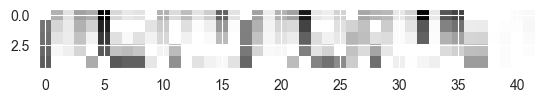

In [95]:
all_images = np.concatenate((train_images, test_images), axis=0)
img = np.mean(all_images, axis=0)
display(pd.DataFrame(img / img.max(axis=0) , columns=columns))
plt.imshow(img / img.max(axis=0), cmap='gray')

train_images = [x / img.max(axis=0) for x in train_images]
test_images = [x / img.max(axis=0) for x in test_images]
train_images, test_images = np.array(train_images), np.array(test_images)


In [96]:
print(type(train_images))
train_images = train_images.reshape(len(train_labels), 5, 42, 1)
test_images = test_images.reshape(len(test_labels), 5, 42, 1)

<class 'numpy.ndarray'>


In [97]:
rating_map = {'S': 1, 'S-': 0.95, 'A+': 0.85, 'A': 0.75, 'A-': 0.65, 'B+': 0.55, 'B': 0.45, 'B-': 0.35, 'C+': 0.2, 'C': 0.1, 'C-': 0}
# rating_map_reverse = {1: 'S', 0.95: 'S-', 0.85: 'A+', 0.75: 'A', 0.65: 'A-', 0.55: 'B+', 0.45: 'B', 0.35: 'B-', 0.2: 'C+', 0.1: 'C', 0: 'C-'}
rating_map_reverse = {1: 0, 0.95: 1, 0.85: 2, 0.75: 3, 0.65: 4, 0.55: 5, 0.45: 6, 0.35: 7, 0.2: 8, 0.1: 9, 0: 10}

save_train_labels = train_labels
save_test_labels = test_labels

# change the number to label
train_labels = np.array([rating_map_reverse[i] for i in train_labels])
test_labels = np.array([rating_map_reverse[i] for i in test_labels])

In [98]:
print(test_labels)

[3 0 3 ... 3 9 7]


In [121]:
import keras
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.metrics import accuracy_score


# cnn regression model
model = Sequential()
model.add(Conv2D(32, (2, 40), activation='relu', input_shape=(5, 42, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_images, train_labels, epochs=100, batch_size=8, validation_split=0.3, callbacks=[early_stop])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

# r2 score
pred = model.predict(test_images)
pred = tf.math.argmax(pred, axis=1)
# print(pred.shape)
# print(test_labels.shape)

display(pred)
display(test_labels)

print(np.count_nonzero(np.array(test_labels) == pred) / len(test_labels))

Epoch 1/100
197/197 [==============================] - 1s 3ms/step - loss: 2.1377 - accuracy: 0.2519 - val_loss: 1.8102 - val_accuracy: 0.3591
Epoch 2/100
197/197 [==============================] - 0s 2ms/step - loss: 1.8018 - accuracy: 0.3715 - val_loss: 1.7133 - val_accuracy: 0.4362
Epoch 3/100
197/197 [==============================] - 0s 2ms/step - loss: 1.6240 - accuracy: 0.4485 - val_loss: 1.5529 - val_accuracy: 0.4599
Epoch 4/100
197/197 [==============================] - 0s 2ms/step - loss: 1.4717 - accuracy: 0.4949 - val_loss: 1.5145 - val_accuracy: 0.4792
Epoch 5/100
197/197 [==============================] - 1s 3ms/step - loss: 1.3121 - accuracy: 0.5509 - val_loss: 1.3987 - val_accuracy: 0.5297
Epoch 6/100
197/197 [==============================] - 0s 2ms/step - loss: 1.1522 - accuracy: 0.6196 - val_loss: 1.4859 - val_accuracy: 0.5163
Epoch 7/100
197/197 [==============================] - 0s 2ms/step - loss: 1.0516 - accuracy: 0.6380 - val_loss: 1.4456 - val_accuracy: 0.5163

<tf.Tensor: shape=(1860,), dtype=int64, numpy=array([10,  2,  6, ...,  7, 10,  7], dtype=int64)>

array([3, 0, 3, ..., 3, 9, 7])

0.06774193548387097


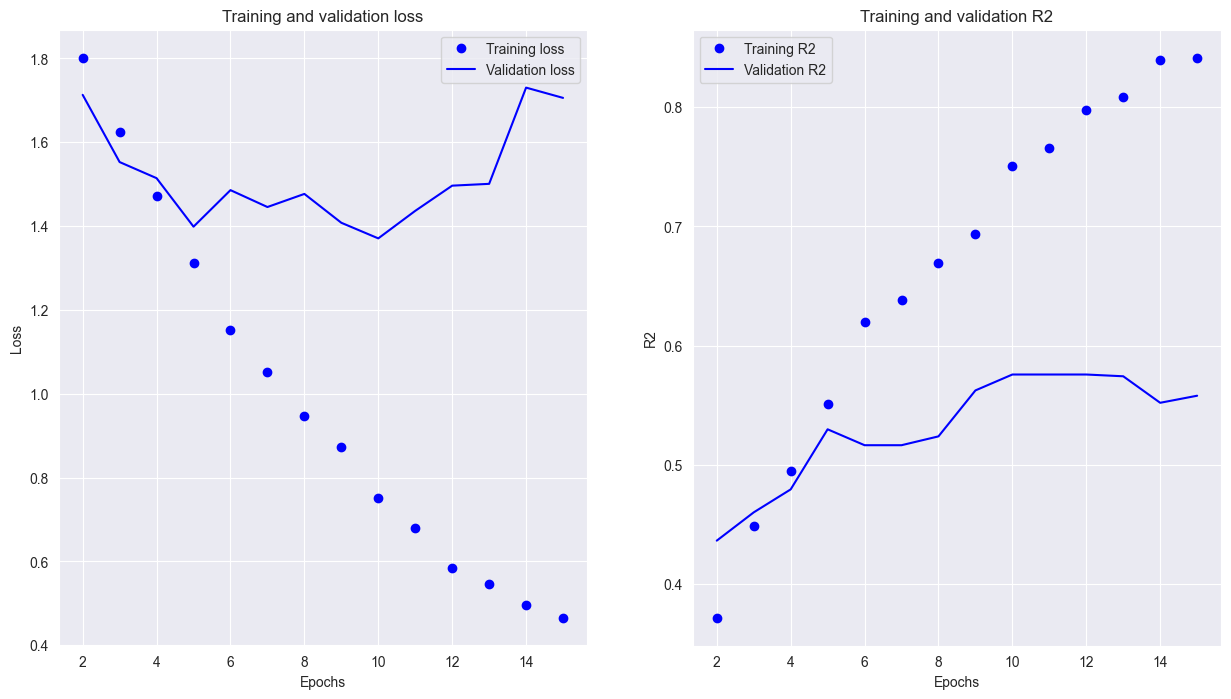

In [122]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].plot(epochs[1:], train_loss[1:], 'bo', label='Training loss')
ax[0].plot(epochs[1:], val_loss[1:], 'b', label='Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epochs[1:], train_acc[1:], 'bo', label='Training R2')
ax[1].plot(epochs[1:], val_acc[1:], 'b', label='Validation R2')
ax[1].set_title('Training and validation R2')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('R2')
ax[1].legend()

plt.show()


In [116]:
from itertools import groupby
groups = groupby(sorted(zip(test_images, test_labels, test_poke), key=lambda x: x[-1]), key=lambda x: x[-1])

pred = []
true = []

for k, v in groups:
	images = []
	for data in v:
		true_ = data[1]
		images.append(data[0])

	pred.append(np.mean(tf.math.argmax(model.predict(np.array(images)), axis=1)))
	true.append(true_)


5/5 [==============================] - 0s 2ms/step


In [117]:
list(zip(true, pred))

[(9, 5.894736842105263),
 (5, 6.1440677966101696),
 (3, 4.3533333333333335),
 (9, 5.111111111111111),
 (6, 5.686567164179104),
 (6, 6.857142857142857),
 (3, 6.36986301369863),
 (10, 6.142857142857143),
 (10, 0.8181818181818182),
 (9, 6.571428571428571),
 (4, 5.079136690647482),
 (9, 5.526315789473684),
 (2, 4.1866666666666665),
 (10, 4.538461538461538),
 (7, 4.576923076923077),
 (8, 5.7272727272727275),
 (8, 7.894736842105263),
 (9, 5.25),
 (9, 6.117647058823529),
 (0, 5.086666666666667),
 (10, 6.642857142857143),
 (4, 5.576576576576577),
 (6, 4.03125),
 (9, 6.666666666666667),
 (7, 5.0),
 (7, 4.859375),
 (5, 6.60655737704918),
 (9, 5.083333333333333),
 (7, 6.2894736842105265),
 (1, 3.4066666666666667)]

In [118]:
r2_score(true, pred)

-0.29327259004676587